In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Carregamento dos Dados
df_world_data_original = pd.read_csv('./world-data-2023.csv')

# 2. Verificação de Valores Faltantes
missing_values_initial = df_world_data_original.isnull().sum()

# 3. Remoção e Preenchimento de Valores Faltantes
# Neste exemplo, preenchemos todos os valores faltantes com zero
df_world_data_original.fillna(0, inplace=True)


<ipython-input-3-846404ce517d>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_world_data_original['GDP'] = df_world_data_original['GDP'].str.replace('$', '').str.replace(',', '')


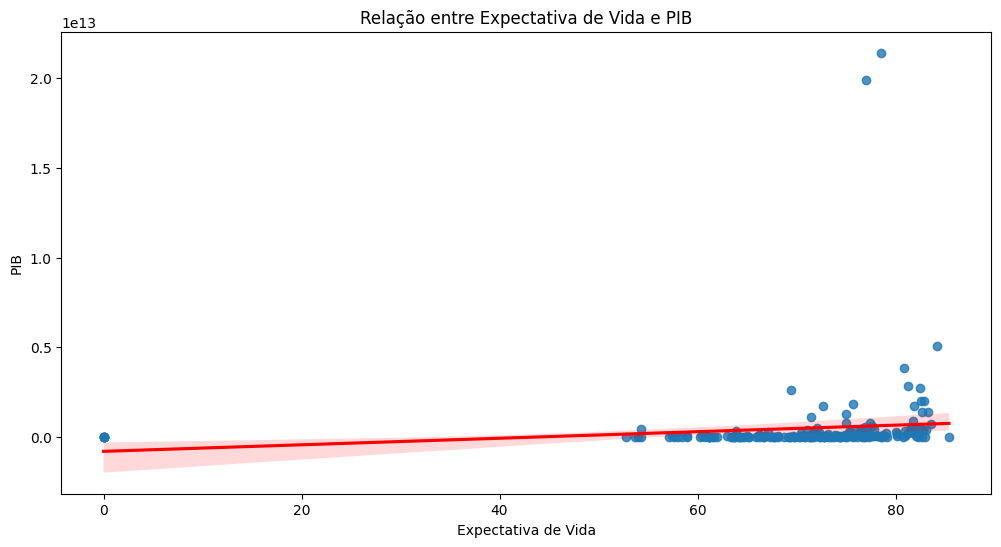

In [3]:

# 4. Conversão de Tipos de Dados
# Convertendo colunas que contêm apenas números com vírgulas para float
for col in df_world_data_original.columns:
    if df_world_data_original[col].apply(lambda x: isinstance(x, str)).all():
        try:
            df_world_data_original[col] = df_world_data_original[col].str.replace(',', '').astype('float')
        except ValueError:
            continue

# 5. Limpeza Específica da Coluna 'GDP'
# Removendo o símbolo do dólar e as vírgulas, e convertendo para números
df_world_data_original['GDP'] = df_world_data_original['GDP'].str.replace('$', '').str.replace(',', '')
df_world_data_original['GDP'] = pd.to_numeric(df_world_data_original['GDP'], errors='coerce')


In [ ]:
# 6. Verificação Final
# Verificando novamente se há valores faltantes
missing_values_final = df_world_data_original.isnull().sum()

# 7. Correlação e Gráficos
# Calculando a correlação entre PIB e Expectativa de Vida
correlation_gdp_life_expectancy = df_world_data_original['GDP'].corr(df_world_data_original['Life expectancy'])

# Criando um gráfico de dispersão para visualizar essa correlação
plt.figure(figsize=(12, 6))
sns.regplot(data=df_world_data_original, x='Life expectancy', y='GDP', line_kws={"color": "red"})
plt.title('Relação entre Expectativa de Vida e PIB')
plt.xlabel('Expectativa de Vida')
plt.ylabel('PIB')
plt.show()